## Import Libraries

In [211]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
from IPython.display import display, Markdown
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans

## Data Preparation

In [212]:
data = pd.read_csv('College.csv')

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

### About dataset

Statistics for a large number of US Colleges from the 1995 issue of US News and
World Report, with 777 observations on the following 18 variables.
1. Private: A factor with levels No and Yes indicating private or public university
2. Apps: Number of applications received
3. Accept: Number of applications accepted
4. Enroll: Number of new students enrolled
5. Top10perc: Pct. new students from the top 10% of H.S. class
6. Top25perc: Pct. new students from the top 25% of H.S. class
7. F.Undergrad: Number of full-time undergraduates
8. P.Undergrad: Number of part-time undergraduates
9. Outstate: Out-of-state tuition
10. Room.Board: Room and board costs
11. Books: Estimated book costs
12. Personal: Estimated personal spending
13. PhD: Pct. of faculty with Ph.D.’s
14. Terminal: Pct. of faculty with a terminal degree
15. S.F.Ratio: Student/faculty ratio
16. perc.alumni: Pct. alumni who donate


## EDA

In [214]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

**Observations:**
* There are 777 rows with 18 columns and data has no null values.
* There are 2 categorical culumns: 'Unnamed: 0' , 'Private'

In [216]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**Observations**
* Standard Deviation is high for App, Accept and Enroll showing that as data is spread out there is considerable varaity of universities and colleges.
* PhD is a percentage but max is 103 (need to check this in the data preprocessing section)
* Grad.Rate is a percentage as well but max is 118 (need to check this in the data preprocessing section)

In [217]:
#Compare the number of private vs public colleges
data["Private"].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

**The number of private colleges is nearly 3 times greater than the number of public colleges**

<AxesSubplot: xlabel='Private', ylabel='count'>

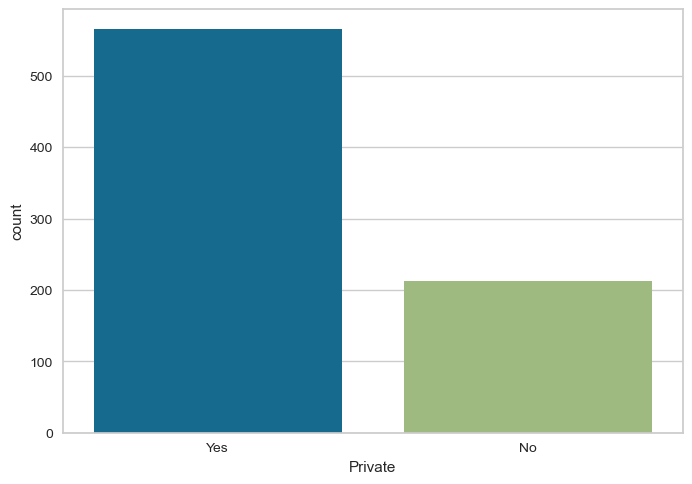

In [218]:
# countplot
sns.countplot(data, x='Private')

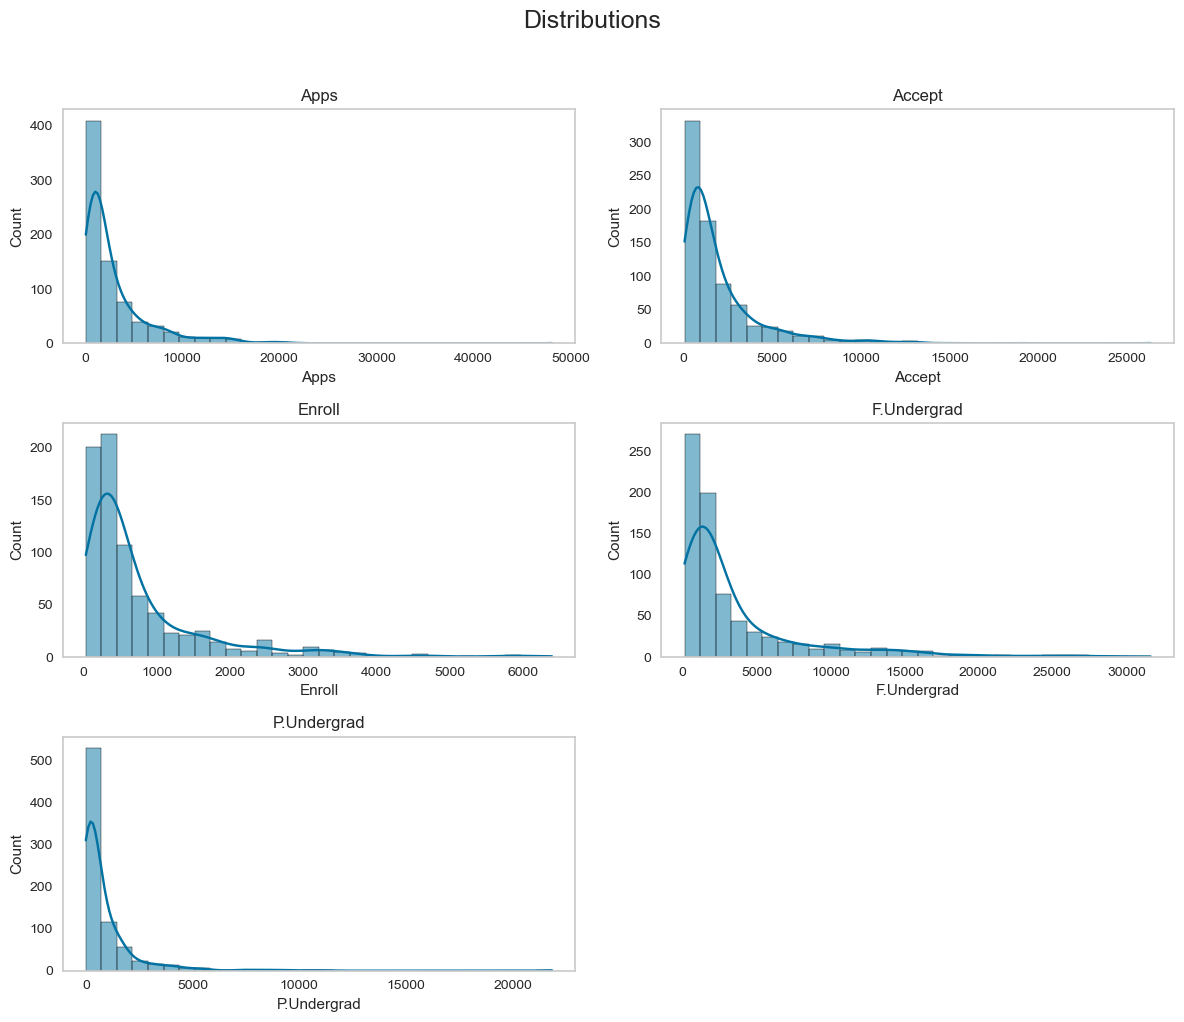

In [219]:
#Specify the columns to plot
columns = ['Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad']

#Create a subgraph for each column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

#Draw histograms with KDE curves for each column
for ax, column in zip(axes.flatten(), columns):
    sns.histplot(data[column], bins=30, kde=True, ax=ax)
    ax.grid(False)  #Remove grid
    ax.set_title(column)   
#Delete the last cell
fig.delaxes(axes[-1][-1])

fig.suptitle('Distributions', fontsize=18, y=1.02)
plt.tight_layout()  #Adjust layout
plt.show()


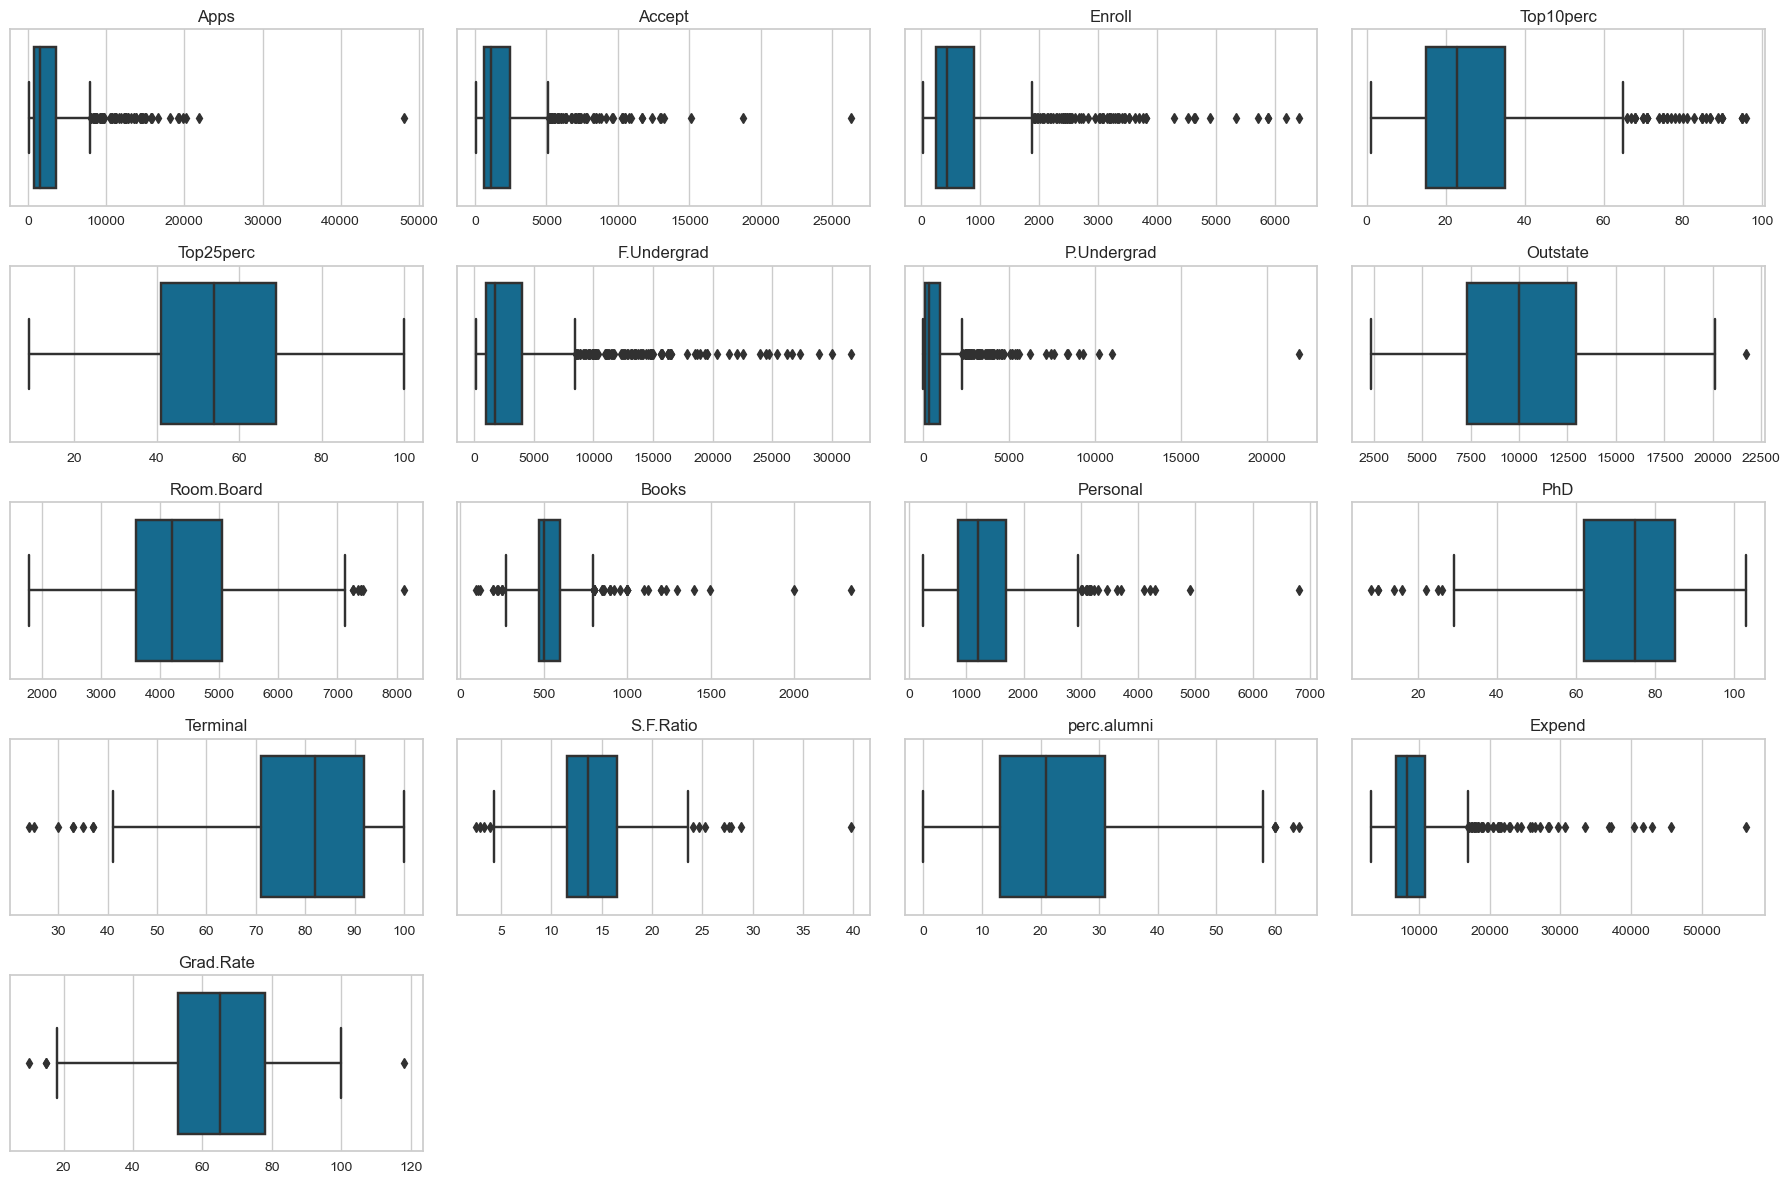

In [220]:
#Set the size of the figure containing the subplots
plt.figure(figsize=(18, 12))
# choose variables
variables = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 
             'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']

#Draw boxplot for each variable
for i, var in enumerate(variables):
    plt.subplot(5, 4, i+1)  #Arrange the charts into a 5x4 grid
    sns.boxplot(x=data[var])
    plt.title(var)
    plt.xlabel('')

plt.tight_layout()
plt.show()

* **Most features have outliners.**
* **Some features have many outliners such as:** 'Apps', 'Accept','Enroll', 'Top10perc', 'F.Undergrad', 'P.Undergrad', 'Books', 'Personal', 'Expend'


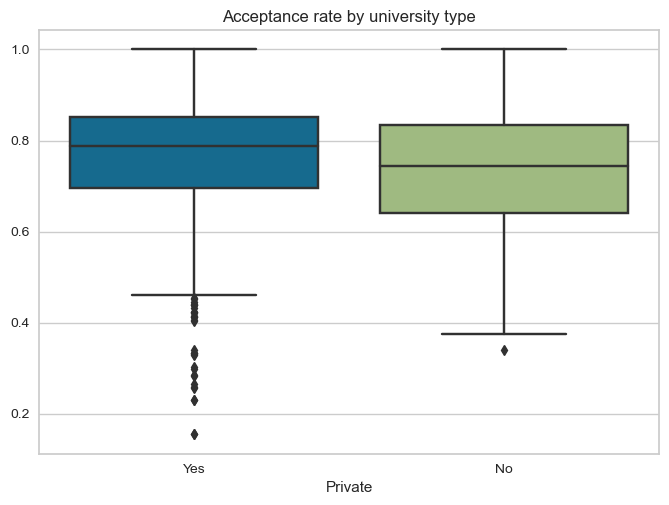

In [221]:
acceptanceR = data['Accept'] / data['Apps']
sns.boxplot(x='Private', y=acceptanceR, data=data)
plt.title('Acceptance rate by university type')
plt.show()

**Observations:**
* Private colleges acceptance rates have many outliers

### Correlation

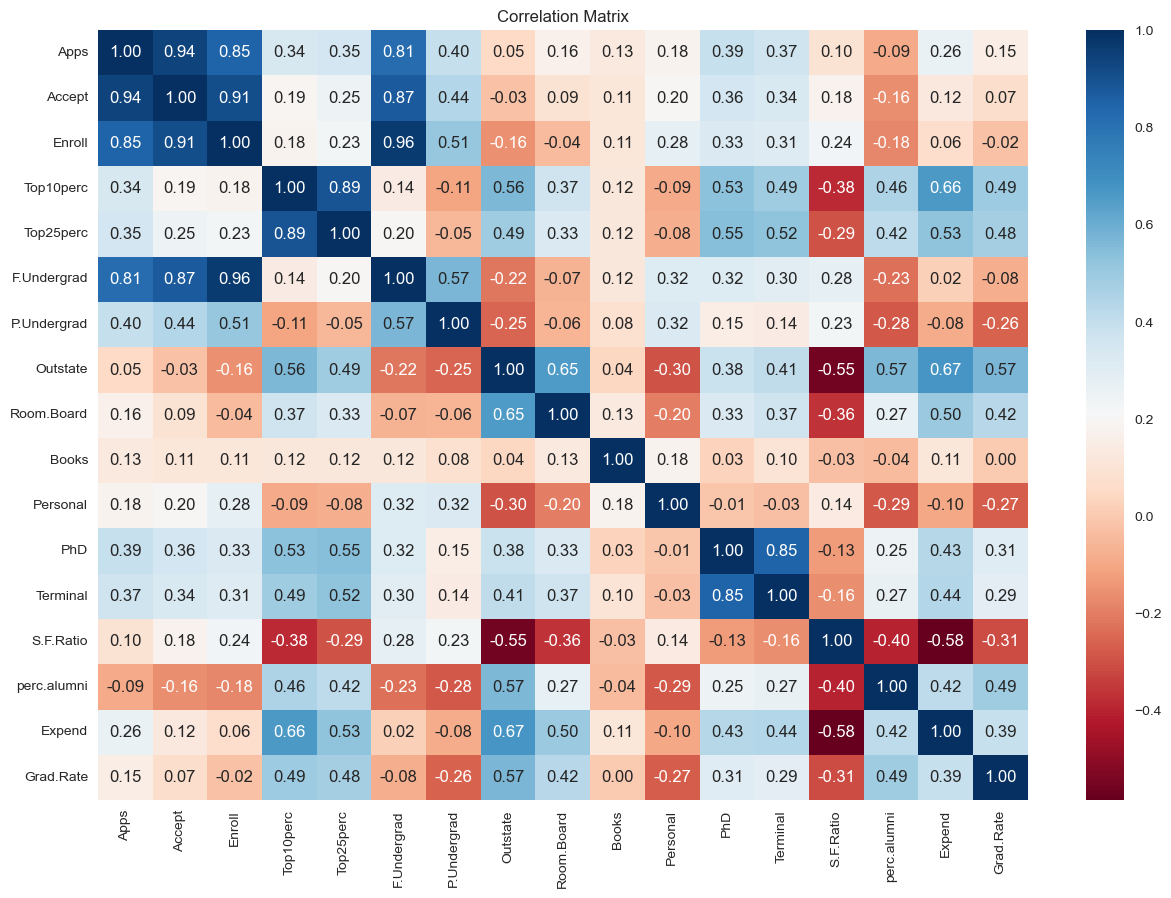

In [222]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt="0.2f", cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

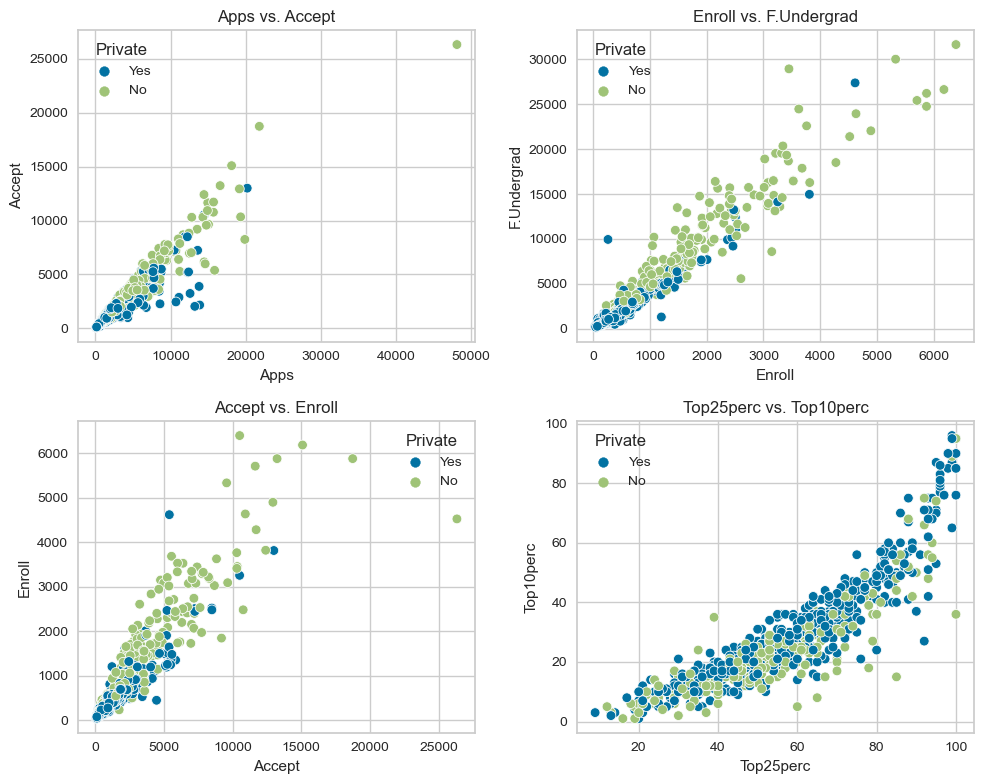

In [223]:
#Visualize variables that are highly correlated with each other
#Set the size for the entire figure containing the subplots
plt.figure(figsize=(10, 8))

# Relationship between Apps vs. Accept
plt.subplot(2, 2, 1)  # (row, col, chart index)
sns.scatterplot(x='Apps', y='Accept', hue='Private', data=data)
plt.title('Apps vs. Accept')

# Relationship between Enroll vs. F.Undergrad
plt.subplot(2, 2, 2)  
sns.scatterplot(x='Enroll', y='F.Undergrad', hue='Private', data=data)
plt.title('Enroll vs. F.Undergrad')

# Relationship between Accept vs. Enroll
plt.subplot(2, 2, 3)  
sns.scatterplot(x='Accept', y='Enroll', hue='Private', data=data)
plt.title('Accept vs. Enroll')

# Relationship between Top25perc vs. Top10perc
plt.subplot(2, 2, 4) 
sns.scatterplot(x='Top25perc', y='Top10perc', hue='Private', data=data)
plt.title('Top25perc vs. Top10perc')

# Show all plots
plt.tight_layout()  # Automatically adjust charts to avoid overlap
plt.show()

## Data Preprocessing

### Checking missing values

In [224]:
#Check for missing data
data.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

**There are no missing data in the dataset**

### Dropping unnecessary columns

In [225]:
data.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [226]:
# check college name
data['Unnamed: 0'].nunique()

777

**All college names are unique, they will not add value to our analysis of dimentionality reduction, we can drop them**

In [227]:
data.drop(columns = 'Unnamed: 0', inplace = True)

In [228]:
data.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

### Checking issue values

In [229]:
# issue values in columns: 'PhD', 'Grad.Rate'
data[(data['PhD'] > 100) | (data['Grad.Rate'] > 100)]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [230]:
#impute issue values to 100
data.loc[582, "PhD"] = 100
data.loc[95, "Grad.Rate"] = 100

In [231]:
print(data.loc[582, 'PhD'])
print(data.loc[95, 'Grad.Rate'])

100
100


### Encoding categorical variables

In [232]:
# Mapping to numerical feature
# 'Yes' to 1, 'No' to 0
data['Private'] = data['Private'].map({'Yes':1, 'No':0})

In [233]:
data['Private']

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private, Length: 777, dtype: int64

### Numeric features scaling

In [234]:
X = data.drop('Private', axis=1)
y = data.Private
#Create a copy of X
X1 = data.drop('Private', axis=1)

In [235]:
X.head(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [236]:
y

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private, Length: 777, dtype: int64

In [237]:
#Standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [238]:
# convert X, X1 to numpy array
X = np.array(X)
X1 = np.array(X1)

## Implement the KMeans clustering 

#### The KMeans clustering algorithm from scratch

In [239]:
#Class Kmeans
class KMeans:
    def __init__(self, n_clusters=2, conver_tol=0.001, max_iter=300):
        self.n_clusters = n_clusters
        self.conver_tol = conver_tol
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_ = None
        self.inertia_ = None
        self.n_iter_ = None
    #Compute k-means clustering.
    def fit(self, data):
        self.cluster_centers_ = self._init_centers(data)
        for i in range(self.max_iter):
            self.labels_ = self.assign_labels(data)
            new_centers = self.update_centers(data)
            self.inertia_ = self._calculate_inertia(data)
            if self.has_converged(new_centers):
                break
            self.cluster_centers_ = new_centers
        self.n_iter_ = i + 1
    #Initialize centers - func
    def _init_centers(self, data):
        return data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]
    #Assign labels - func
    def assign_labels(self, data):
        return np.array([np.argmin(np.linalg.norm(x - self.cluster_centers_, axis=1)) for x in data])
    #Updata centers - func
    def update_centers(self, data):
        return np.array([data[self.labels_ == k].mean(axis=0) for k in range(self.n_clusters)])
    #Check the stopping condition of the algorithm - func
    def has_converged(self, new_centers):
        return np.all(np.linalg.norm(new_centers - self.cluster_centers_, axis=1) <= self.conver_tol)
    #Sum of squared distances of the samples to their nearest cluster center - func
    def _calculate_inertia(self, data):
        distances = np.linalg.norm(data - self.cluster_centers_[self.labels_], axis=1)
        return np.sum(distances ** 2)
    #Predict the closest cluster each sample in X belongs to.
    def predict(self, data):
        return np.array([np.argmin(np.linalg.norm(x - self.cluster_centers_, axis=1)) for x in data])
    #Transform data to cluster-distance space
    def transform(self, data):
        return np.array([[np.linalg.norm(x - center) for center in self.cluster_centers_] for x in data])

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

    def fit_predict(self, data):
        self.fit(data)
        return self.labels_


* **Fit: KMeans model training.**

* **Predict: Predict cluster labels for the original data.**

* **Transform: Converts the original data to distances to cluster centers.**


In [240]:
# Initialize and fit the KMeans model
# test kmeans with n_cluster = 4
kmeans = KMeans(n_clusters=4, max_iter=300)
labels = kmeans.fit_predict(X)

# Get distances to cluster centers
display(Markdown("**Distances to cluster centers:**\n"))
print(kmeans.transform(X), "\n")

# Print cluster centers
display(Markdown("**Cluster Centers:**\n"))
print(kmeans.cluster_centers_, "\n")

# Print inertia
display(Markdown("**Inertia:**\n"))
print(kmeans.inertia_, "\n")

# Print cluster labels
display(Markdown("**Cluster labels:**\n"))
print(labels, "\n")


**Distances to cluster centers:**


[[ 2.2657676   4.72326528  2.30664443  6.70586111]
 [ 6.13616435  6.66584865  4.51245492  8.80522693]
 [ 4.08120842  4.05749149  1.53994526  7.66588698]
 ...
 [ 3.04297404  3.73384166  1.98911626  6.58732437]
 [10.60392871  7.26698727 10.57811541  9.77343597]
 [ 3.63163622  4.38887069  3.37712475  6.58164493]] 



**Cluster Centers:**


[[ 0.3609125   0.42757201  0.62701432 -0.44304969 -0.28014739  0.72947328
   0.81348985 -0.87479839 -0.5206943   0.2273274   0.8173189   0.30588892
   0.32365272  0.84737028 -0.81289275 -0.48213907 -0.70645173]
 [-0.02419501 -0.11316469 -0.23352067  0.86442237  0.84298375 -0.30357251
  -0.37483008  1.07701623  0.75016532  0.00809912 -0.41812235  0.76764049
   0.76871111 -0.62778052  0.84079285  0.82916925  0.79261262]
 [-0.5024164  -0.49167374 -0.48703062 -0.50381041 -0.56872713 -0.47791878
  -0.26230112 -0.34878519 -0.32414168 -0.13537278 -0.10315067 -0.74008625
  -0.7406903   0.04175404 -0.20852418 -0.40139648 -0.27777602]
 [ 2.59751512  2.75980112  2.78810318  0.59753977  0.74008534  2.79400775
   1.47569663 -0.3507327   0.08714552  0.3297918   0.59864051  0.83170883
   0.78924798  0.48478257 -0.39204349  0.16333122  0.02947723]] 



**Inertia:**


7624.7870916226475 



**Cluster labels:**


[0 2 2 1 2 2 1 1 1 2 1 1 2 1 2 2 1 2 2 0 1 0 2 3 1 2 1 3 2 1 2 1 2 2 2 2 1
 1 2 0 1 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 0 2 2 3 1 3 2 0 1 2 2 2 2 3 1 1 1 2
 1 2 2 2 0 0 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 1 2 2 2 2 1 0 0 0 2 1 2 1 2 1
 2 0 2 1 1 2 1 0 2 1 2 1 1 2 0 2 1 2 2 1 2 2 2 2 2 2 1 1 1 1 3 0 2 1 2 2 2
 2 1 2 1 1 2 2 2 2 2 1 1 2 2 1 1 1 2 2 2 2 2 2 1 1 1 1 1 0 0 2 2 2 0 2 2 1
 1 2 2 2 2 1 1 0 1 2 2 1 2 2 2 1 0 2 3 2 1 0 0 2 2 2 2 2 1 2 2 2 2 0 1 2 1
 3 0 2 1 2 1 2 2 1 2 2 0 2 2 2 1 2 2 1 2 1 1 1 0 2 2 2 1 1 1 2 1 1 1 1 0 1
 1 1 2 2 2 2 2 2 2 1 0 1 2 2 0 3 2 2 3 1 3 2 2 2 1 1 2 2 1 0 2 2 2 1 2 2 2
 1 2 0 1 2 1 2 0 2 2 1 1 1 1 2 2 2 1 2 2 2 0 1 2 2 0 2 2 0 0 1 1 1 1 1 2 2
 2 1 2 2 2 1 1 0 2 1 2 1 0 1 0 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 3 3 0 2 0
 2 2 1 2 2 0 2 2 2 1 2 2 0 0 2 0 1 2 2 2 1 2 2 2 2 1 2 1 1 2 1 0 2 2 1 1 0
 3 2 1 2 0 3 2 1 0 2 0 3 0 0 2 2 2 1 2 2 0 1 1 1 1 3 1 2 2 0 2 2 2 0 1 2 2
 2 3 1 2 2 2 2 2 2 1 2 2 1 0 1 1 1 3 2 2 1 0 0 1 1 1 1 1 1 0 1 2 1 2 2 2 1
 1 0 3 0 0 2 2 2 0 2 2 2 

### Implement Pca to reduce the data dimensionality to 2 dimensions and then visualize it with a scatter plot

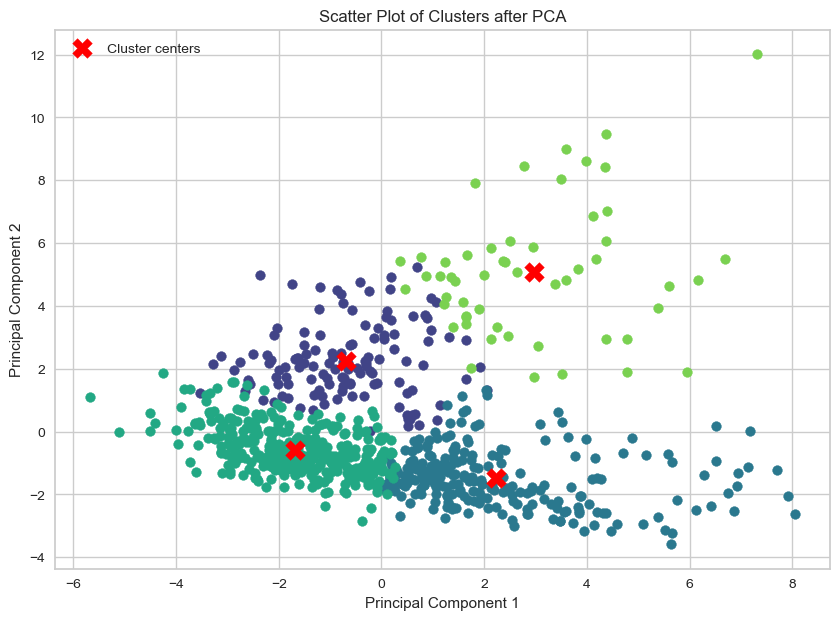

In [241]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 7))
unique_labels = np.unique(labels)
palette = sns.color_palette("viridis", n_colors=len(np.unique(labels)))

for label in unique_labels:
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], color=palette[label])
    
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='red', marker='X', label='Cluster centers')
plt.title('Scatter Plot of Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

### Find optimal value of clusters

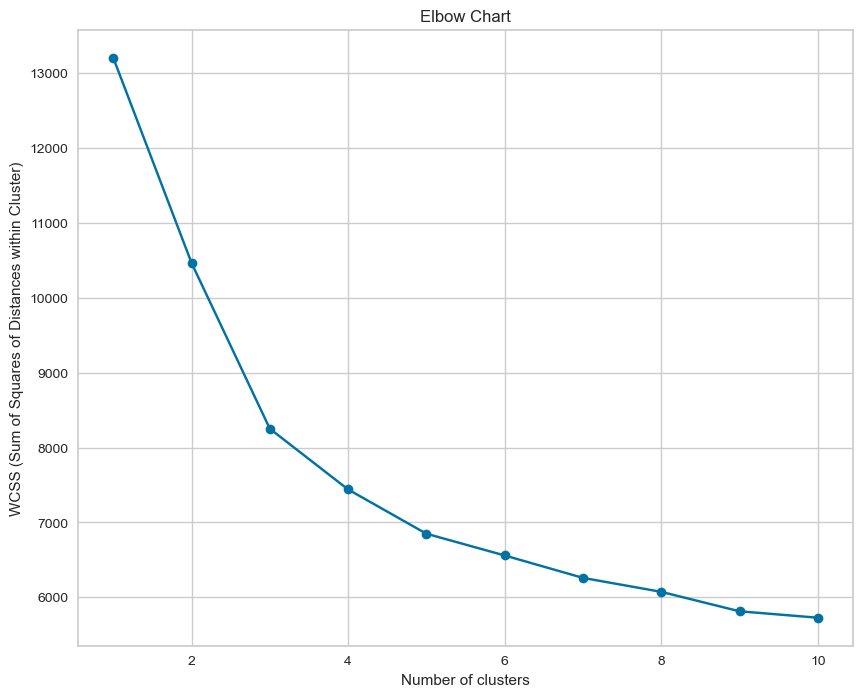

In [242]:
#Select the number of clusters using elbow
def calculate_wcss(data):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

#Calculate WCSS for different numbers of clusters
wcss = calculate_wcss(X)

plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Chart')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Sum of Squares of Distances within Cluster)')
plt.show()

**Observations:** 
* The possible number of cluster are:  3, 4, 5.

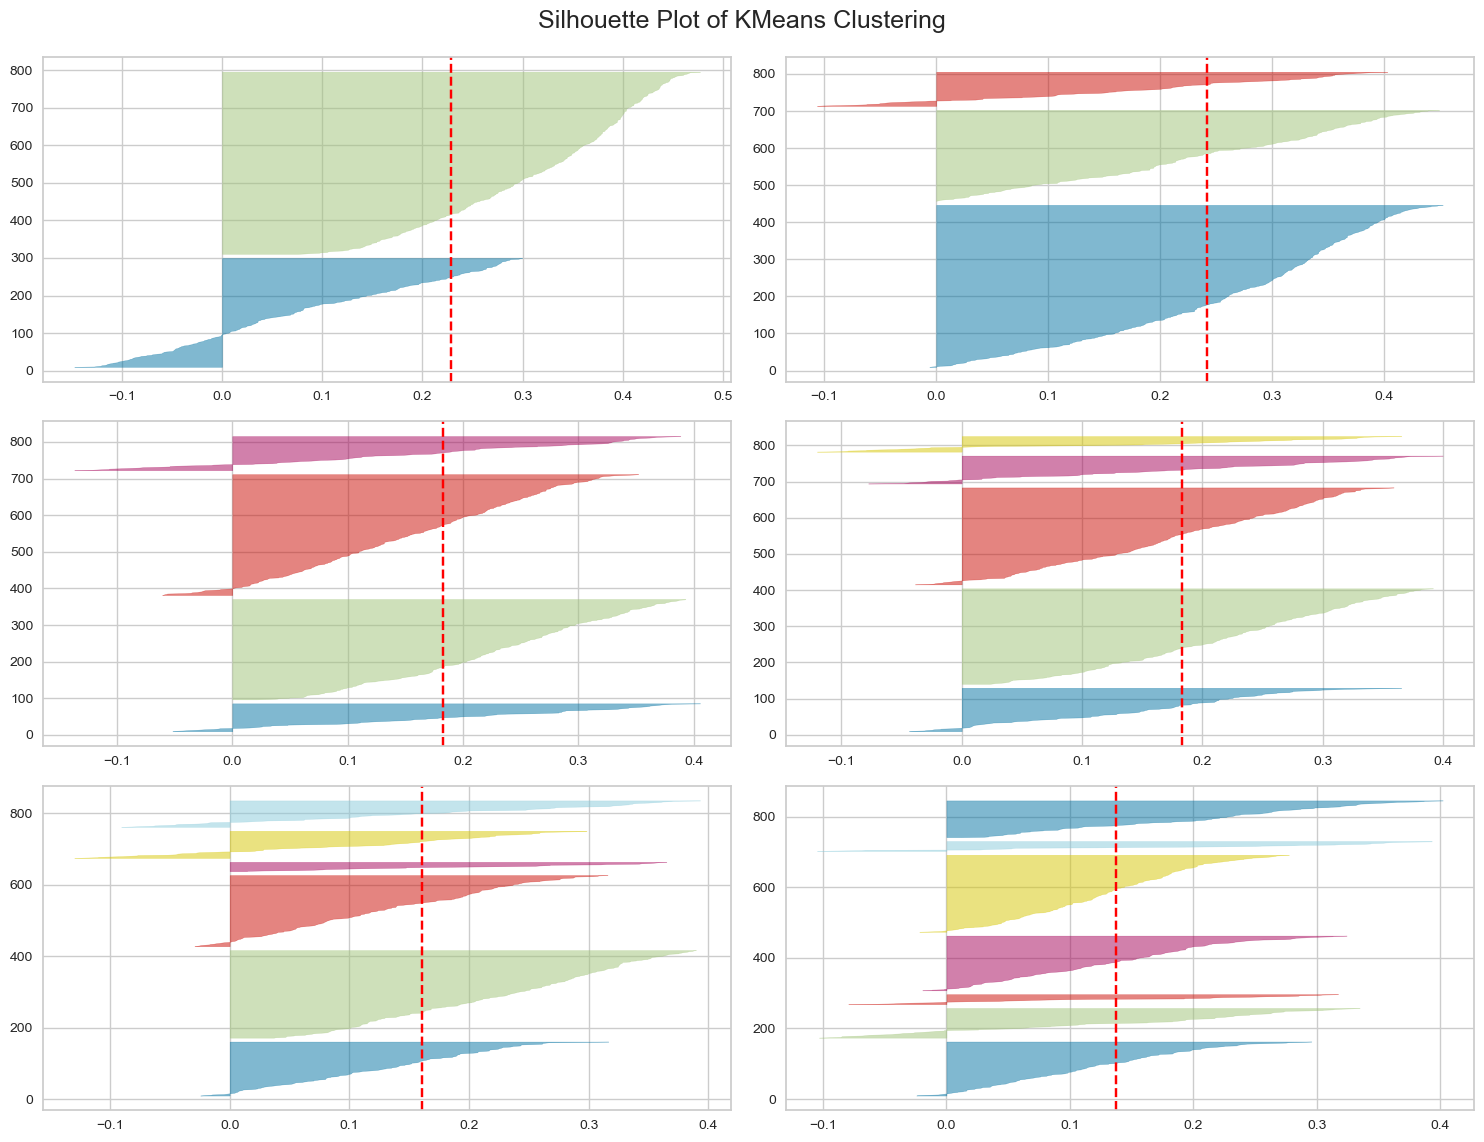

In [243]:
# Draw silhouettes from the sklearn library
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Silhouette Plot of KMeans Clustering', fontsize=18, y=0.95)

for i, k in enumerate([2, 3, 4, 5, 6, 7]):
    kmeans = KMeans(n_clusters=k)  # Adding random_state for reproducibility
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* **Observed from the elbow graph, we can choose n_clusters to be 3 or 4 or 5**
* **Observing the graphs, in the silhouette method, we see that n = 3 has fewer points assigned to the wrong cluster than n = 4 and n = 5.**
* **Therefore we will choose n = 3**

### Compare the results of the class KMeans algorithm and the Sklearn KMeans.

In [244]:
k_optimal = 3  

# Apply KMeans with optimal number of clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, max_iter=300)
kmeans_optimal.fit(X)

#Compare results with scikit-learn
kmeans_sk_optimal = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_sk_optimal.fit(X)

#Check the cluster labels

display(Markdown("**Custom - KMeans labels:**\n"))
print(kmeans_optimal.labels_,"\n")
display(Markdown("**Sklearn - KMeans labels:**\n"))
print(kmeans_sk_optimal.labels_,"\n")

**Custom - KMeans labels:**


[1 1 1 2 1 1 2 2 2 1 2 2 1 2 1 1 2 1 1 1 2 0 1 0 2 1 2 0 1 2 1 2 1 1 1 1 2
 2 1 0 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 0 2 0 1 2 2 1 1 1 1 0 2 2 2 1
 2 1 1 1 0 0 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 1 2 2 2
 1 1 1 2 2 1 2 0 1 2 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 2 2 0 1 1 2 1 1 1
 1 2 2 2 2 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 2 0 1 1 1 1 1 1 1 2
 2 1 1 1 1 2 2 1 2 1 1 2 1 1 1 2 0 1 0 1 2 1 1 1 1 1 1 1 2 1 1 1 1 0 2 1 2
 0 0 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 2 2 1 1 1 1 2 2 2 1 2 2 2 2 0 2
 2 2 1 1 1 1 1 1 1 2 0 2 1 1 0 0 1 1 0 2 0 1 1 1 2 2 1 1 2 0 1 1 1 2 1 1 1
 2 1 1 2 1 2 1 1 1 1 2 2 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 0 1 2 2 2 2 2 1 1
 1 2 1 1 1 2 2 1 1 2 1 2 0 2 1 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 0 0 1 1 1
 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 2 2 1 2 1 1 1 2 2 1
 0 1 2 1 1 0 1 2 1 1 1 0 0 0 1 1 1 2 1 1 1 2 2 2 2 0 2 1 1 0 1 1 1 0 2 1 2
 1 0 2 1 1 1 1 1 1 2 1 1 2 1 2 2 2 0 1 1 2 1 1 2 2 2 2 2 2 1 2 1 2 1 1 1 2
 2 1 0 1 1 1 1 1 1 1 1 2 

**Sklearn - KMeans labels:**


[2 2 2 1 2 2 1 1 1 2 1 1 2 1 2 2 1 2 2 2 1 0 2 0 1 2 1 0 2 1 2 1 2 2 2 2 1
 1 2 0 1 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 0 1 0 2 1 1 2 2 2 2 0 1 1 1 2
 1 2 2 2 0 0 2 2 2 2 1 2 1 1 2 2 2 1 2 2 1 2 1 2 2 2 2 1 2 2 2 2 1 2 1 2 1
 2 2 2 1 1 2 1 0 2 1 2 1 1 2 2 2 1 2 2 1 2 2 2 2 2 2 1 1 1 1 0 2 2 1 2 2 2
 2 1 1 1 1 2 2 2 2 2 1 1 2 2 1 1 1 2 2 2 2 2 2 1 1 1 1 1 0 2 2 2 2 2 2 2 1
 1 2 2 2 2 1 1 2 1 2 2 1 2 2 2 1 0 2 0 2 1 2 2 2 2 2 2 2 1 2 2 2 2 0 1 2 1
 0 0 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 1 2 1 1 1 2 2 2 2 1 1 1 2 1 1 1 1 0 1
 1 1 2 2 2 2 2 2 2 1 0 1 2 2 0 0 2 2 0 1 0 2 2 2 1 1 2 2 1 0 2 2 2 1 2 2 2
 1 2 2 1 2 1 2 2 2 2 1 1 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 0 2 1 1 1 1 1 2 2
 2 1 2 2 2 1 1 2 2 1 2 1 0 1 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 0 0 2 2 2
 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 1 1 2 1 2 2 2 1 1 2
 0 2 1 2 2 0 2 1 2 2 2 0 0 0 2 2 2 1 2 2 2 1 1 1 1 0 1 2 2 0 2 2 2 0 1 2 1
 2 0 1 2 2 2 2 2 2 1 2 2 1 2 1 1 1 0 2 2 1 2 2 1 1 1 1 1 1 2 1 2 1 2 2 2 1
 1 2 0 2 2 2 2 2 2 2 2 2 

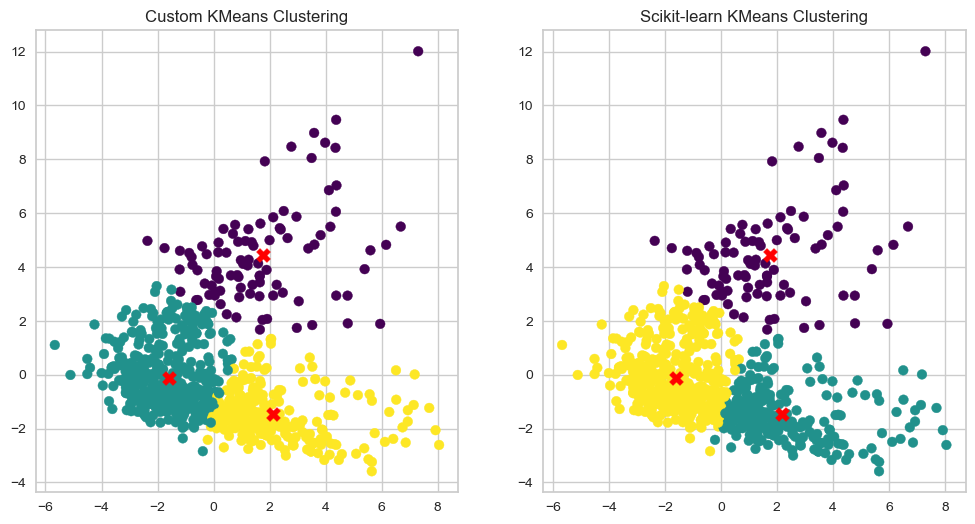

In [245]:
# visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis')
# Transform the cluster centers
centers_pca = pca.transform(kmeans_optimal.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=100, c='red', marker='X')
plt.title('Custom KMeans Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_sk_optimal.labels_, cmap='viridis')
# Transform the cluster centers
centers_sk_pca = pca.transform(kmeans_sk_optimal.cluster_centers_)
plt.scatter(centers_sk_pca[:, 0], centers_sk_pca[:, 1], s=100, c='red', marker='X')
plt.title('Scikit-learn KMeans Clustering')

plt.show()

**The clustering results of Custom - KMeans and Sklearn - KMeans are the same**

## Compare with the Private attribute 

In [246]:
#Selecting 2 clusters for comparison with the 'Private' attribute.
#Apply KMeans
kmeans_optimal = KMeans(n_clusters=2, max_iter=300)
kmeans_optimal.fit(X)

#Compare results with scikit-learn
kmeans_sk_optimal = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_sk_optimal.fit(X)

display(Markdown("**Custom - KMeans labels:**\n"))
print(kmeans_optimal.labels_,"\n")
display(Markdown("**Sklearn - KMeans labels:**\n"))
print(kmeans_sk_optimal.labels_,"\n")

**Custom - KMeans labels:**


[0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 

**Sklearn - KMeans labels:**


[1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0
 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1
 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 

In [247]:
# use accuracy, confuse matrix, classifier report
accuracy = accuracy_score(kmeans_optimal.labels_, kmeans_sk_optimal.labels_)
conf_matrix = confusion_matrix(kmeans_optimal.labels_, kmeans_sk_optimal.labels_)
class_report = classification_report(kmeans_optimal.labels_, kmeans_sk_optimal.labels_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.0
Confusion Matrix:
 [[  0 486]
 [291   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     486.0
           1       0.00      0.00      0.00     291.0

    accuracy                           0.00     777.0
   macro avg       0.00      0.00      0.00     777.0
weighted avg       0.00      0.00      0.00     777.0



**We notice that the KMeans class and the Kmeans class from the sklearn library have classified completely the same. The only difference is that they have assigned labels in reverse. To facilitate comparison, we will switch the labels of the Kmeans class (0->1 and 1->0).**

In [248]:
kmeans_labels_switched = np.where(kmeans_optimal.labels_ == 0, 1, 0)
accuracy = accuracy_score(kmeans_labels_switched, kmeans_sk_optimal.labels_)
conf_matrix = confusion_matrix(kmeans_labels_switched, kmeans_sk_optimal.labels_)
class_report = classification_report(kmeans_labels_switched, kmeans_sk_optimal.labels_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[291   0]
 [  0 486]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       486

    accuracy                           1.00       777
   macro avg       1.00      1.00      1.00       777
weighted avg       1.00      1.00      1.00       777



**We observe that the results from the KMeans class and the Kmeans class from the scikit-learn library yield the same results. Therefore, we will take one type of label for comparison with the 'Private' attribute in the dataset**

In [250]:
# Compare with private attribute in dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y, kmeans_labels_switched))
print(confusion_matrix(y, kmeans_labels_switched))
print(classification_report(y, kmeans_labels_switched))

0.5225225225225225
[[ 66 146]
 [225 340]]
              precision    recall  f1-score   support

           0       0.23      0.31      0.26       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777



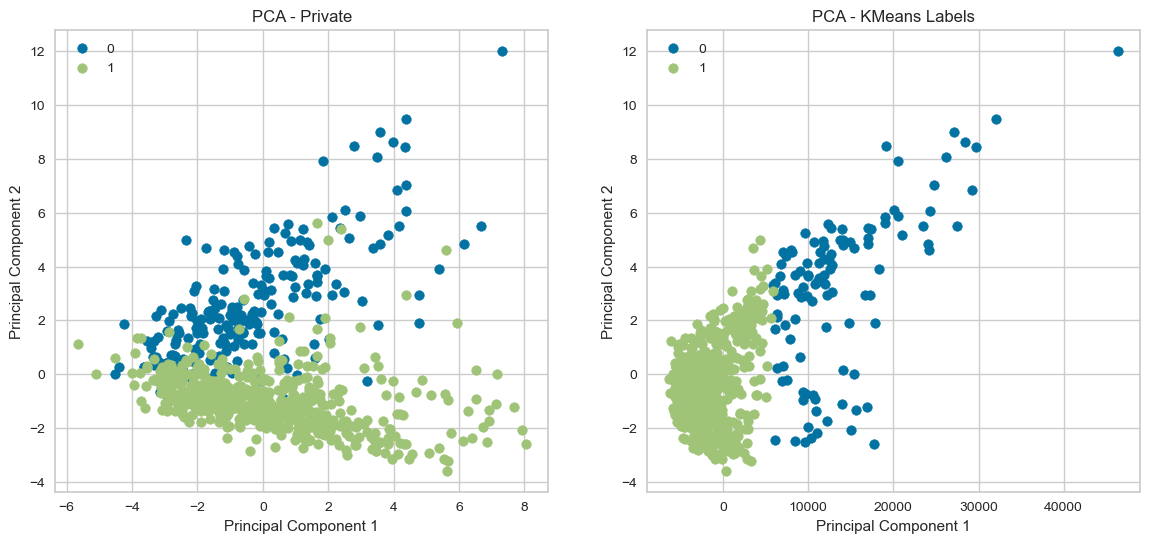

In [264]:
# Draw a scatter plot between the reduced dimensionality (PCA) data with the label 'Private
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)
plt.title('PCA - Private')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Draw a scatter plot between the reduced dimensionality (PCA) data and the KMeans labels
plt.subplot(1, 2, 2)
for label in np.unique(kmeans_labels_switched):
    plt.scatter(X1_pca[kmeans_labels_switched == label, 0], X_pca[kmeans_labels_switched == label, 1], label=label)
plt.title('PCA - KMeans Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

**Accuracy: 0.5225 (52.25%)**:
 - The overall accuracy is 52.25%, indicating that just over half of the data points are classified correctly. This is a mediocre result, neither good nor too bad

**Confusion Matrix**:
* First row (66, 146): There are 66 samples belonging to class 0 predicted correctly, but 146 samples belonging to class 0 are misclassified into class 1. 

* Second row (225, 340): There are 340 samples belonging to class 1 predicted correctly, but 225 samples belonging to class 1 are misclassified into class 0.

* From this confusion matrix, we observe that the model tends to misclassify quite a lot, especially from class 0 to class 1.

**Classification Report:**
* Precision: The ratio of true positives to the total predicted positives for each class. Class 0 has a low precision (0.23), while class 1 has a higher precision (0.70).

* Recall: The ratio of true positives to the total actual positives for each class. Class 0 has a low recall (0.31), while class 1 has a higher recall (0.60).

* F1-Score: The harmonic mean of precision and recall. Class 0 has a low F1-Score (0.26), while class 1 has a higher F1-Score (0.65).

**Overall rating:**
* This KMeans clustering model exhibits low performance, particularly for class 0. Both the precision and recall of class 0 are low, resulting in a low F1-Score.

* For class 1, the model performs better but still not satisfactorily.

* The overall accuracy of the model is 52.25%, indicating ineffective clustering of the data.

* The number of samples for label 1 (565) is significantly higher than label 0 (212), which may lead to imbalance in the model's learning.

## Experiment with data without standardization

In [251]:
kmeans_optimal = KMeans(n_clusters=2, max_iter=300)
kmeans_optimal.fit(X1)

kmeans_sk_optimal = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_sk_optimal.fit(X1)

display(Markdown("**Custom - KMeans labels:**\n"))
print(kmeans_optimal.labels_,"\n")
display(Markdown("**Sklearn - KMeans labels:**\n"))
print(kmeans_sk_optimal.labels_,"\n")

**Custom - KMeans labels:**


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

**Sklearn - KMeans labels:**


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [252]:
#Check the results of class Kmeans and Sklearn Kmeans
accuracy = accuracy_score(kmeans_optimal.labels_, kmeans_sk_optimal.labels_)
print("Accuracy:", accuracy)

Accuracy: 1.0


**We observe that the results from the KMeans class and the Kmeans class from the scikit-learn library yield the same results. Therefore, we will take one type of label for comparison with the 'Private' attribute in the dataset**

In [253]:
# Compare with private attribute in dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y, kmeans_optimal.labels_))
print(confusion_matrix(y, kmeans_optimal.labels_))
print(classification_report(y, kmeans_optimal.labels_))

0.22136422136422138
[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



**Observing that the KMeans algorithm assigns label 0 corresponding to 'Yes' and label 1 corresponding to 'No', opposite to the encoding of 'Private'. Therefore, we proceed to swap the labels of KMeans.**

In [255]:
# Swap labels of KMeans
kmeans_labels_switched = np.where(kmeans_optimal.labels_ == 0, 1, 0)

#Calculate accuracy score after swapping labels
accuracy = accuracy_score(y, kmeans_labels_switched)
conf_matrix = confusion_matrix(y, kmeans_labels_switched)
class_report = classification_report(y, kmeans_labels_switched)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7786357786357786
Confusion Matrix:
 [[ 74 138]
 [ 34 531]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



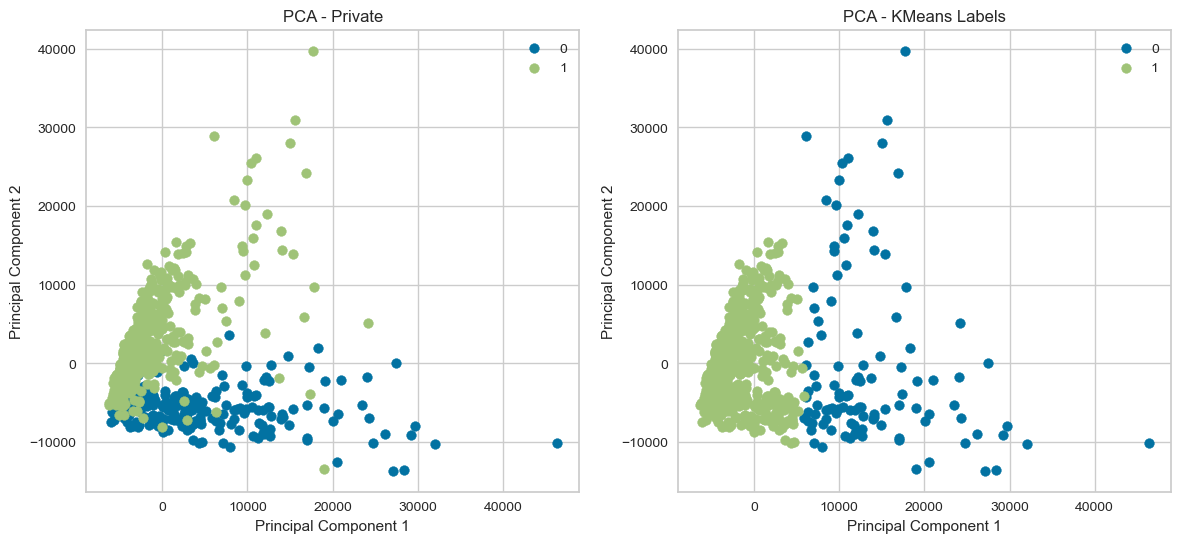

In [260]:
# Apply PCA to reduce the data dimensionality to 2 dimensions
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)

# Draw a scatter plot between the reduced dimensionality (PCA) data with the label 'Private
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for label in np.unique(y):
    plt.scatter(X1_pca[y == label, 0], X1_pca[y == label, 1], label=label)
plt.title('PCA - Private')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Draw a scatter plot between the reduced dimensionality (PCA) data and the KMeans labels
plt.subplot(1, 2, 2)
for label in np.unique(kmeans_labels_switched):
    plt.scatter(X1_pca[kmeans_labels_switched == label, 0], X1_pca[kmeans_labels_switched == label, 1], label=label)
plt.title('PCA - KMeans Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

**Accuracy: 0.7786 (77.86%)**

* The accuracy has increased significantly compared to the previous result (from 52.25% to 77.86%). This suggests that not performing scaling may have helped the clustering model perform better in this case.

**Confusion Matrix:**   
* First row (74, 138): There are 74 samples belonging to class 0 predicted correctly, but 138 samples belonging to class 0 are misclassified into class 1.

* Second row (34, 531): There are 531 samples belonging to class 1 predicted correctly, but 34 samples belonging to class 1 are misclassified into class 0.

* From this confusion matrix, we observe that the model still has some misclassifications, but overall, there is a significant improvement compared to before, especially in reducing misclassifications from class 1 to class 0.


**Classification Report**

* Precision: The ratio of true positives to the total predicted positives for each class. Class 0 has a fairly good precision (0.69), and class 1 has a high precision (0.79).

* Recall: The ratio of true positives to the total actual positives for each class. Class 0 has a low recall (0.35), while class 1 has a very high recall (0.94).

* F1-Score: The harmonic mean of precision and recall. Class 0 has an average F1-Score (0.46), while class 1 has a high F1-Score (0.86).

**Overall rating:**

* This KMeans clustering model performs significantly better than the previous model when not performing scaling/standardization.

* The overall accuracy of the model is 77.86%, indicating more effective clustering of the data.

* The precision and recall of class 1 are very high, indicating that the model is very good at identifying class 1. However, class 0 still has some issues with low recall.

* This also suggests that not performing scaling may be more suitable in this case.


## Summary Report

**Objective:** The objective of this assignment is to deepen your understanding of the K-Means clustering algorithm by implementing it from scratch using object-oriented programming (OOP) principles. You will create a custom KMeans class with methods such as fit, transform, and predict, following the API standards similar to Sklearn. Through this assignment, you will gain insights into the inner workings of the algorithm and its practical applications.


### Methods
**1.EDA**

**2.Data Preprocessing**
* Dropping unnecessary columns: 'Unnamed: 0'
* Checking issue values: in columns: 'PhD', 'Grad.Rate'
* Encoding categorical variables: 'Private' {'Yes' to 1, 'No' to 0}
* Numeric features scaling

**3.Implement the KMeans clustering**
* Implement the KMeans clustering algorithm from scratch using Numpy
* Test class KMeans with n_cluster = 4
* Implement Pca to reduce the data dimensionality to 2 dimensions and then visualize it with a scatter plot
* Find optimal value of clusters: Use elbow and silhouette: Get the result n_clusters = 3
* Compare the results of the class KMeans algorithm and the Sklearn KMeans. (same)
* Compare with the Private attribute
* Experiment with data without standardization

### Result

* The KMeans class implements k-means clustering from scratch, producing similar results to the KMeans from the   scikit-learn library.
  Check by: plotting scatter plots for both methods.


* When setting n_clusters = 2 to compare with the Private attribute: the accuracy is only around 52%, indicating   that the model's performance is not high (checked using accuracy score, confusion matrix, classification report).


* Experimenting with data without standardization: the accuracy has greatly improved to 78%, indicating more effective clustering of the data (checked using accuracy score, confusion matrix, classification report).

>This also suggests that not performing scaling may be more suitable in this case. So the "best practise" will not always be best.

### Findings
* Scaling affects Clustering Results 
* Maybe KMenas Clustering is highly sensitive to scaling

